In [ ]:


#@title Install dependencies
!pip install git+https://github.com/huggingface/diffusers
!git clone https://github.com/huggingface/diffusers
!pip install -r diffusers/examples/dreambooth/requirements.txt
!pip install bitsandbytes
!pip install xformers
!pip install lit
!pip install colab-xterm

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-me8g91mb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-me8g91mb
  Resolved https://github.com/huggingface/diffusers to commit ec953047bc0f4a3542e673f3d463543c02505ca5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1944046 sha256=8e814bf87c0cc1ef879a3dd29ca61af11fe0fb012256fcf3c905c1f825c3e909
  Stored in directory: /tmp/pip-ephem-wheel-cache-2qamus_a/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
Cloning into 'diffusers'...
remote: Enumerating objects: 56034, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 56034 (delta 3), reused 8 (delta 2), pack-reused 56023
Recei

In [ ]:
#@title setup accelerate with floating point 16-bit
from accelerate.utils import write_basic_config
write_basic_config(mixed_precision="fp16")

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

## Log in to HuggingFace

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


# Mount Google Drive
For downloading person instance images and class images to workspace, and storing your model checkpoints output to google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Stable Diffusion

In [ ]:
#@title Try out stable diffusion model on HuggingFace

import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

model_id = "CompVis/stable-diffusion-v1-4" #@param {type:"string"}
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

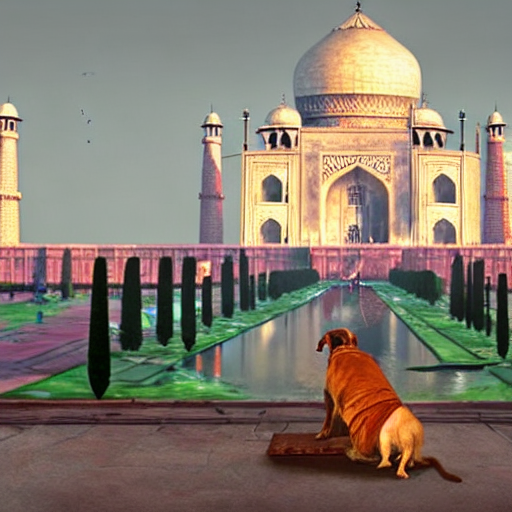

In [ ]:
prompt = "A person eating dinner with a dog in front of the taj mahal in the taj mahal, an archaeological painting by Greg Rutkowski and James Gurney, trending on Artstation FPS. 4k, 8k audio, professional portfolio" #@param {type:"string"}
image = pipe(prompt).images[0]

display(image)

## Use Microsoft/Promptist to refine prompt

In [ ]:
# Load Microsoft/Promptist pipeline
from transformers import pipeline

promptist_pipe = pipeline("text-generation", model="microsoft/Promptist")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
prompt = 'A person eating dinner with a dog in front of the taj mahal' #@param {type:"string"}
result = promptist_pipe(prompt)
print(f'Optimized Prompt: {result[0]["generated_text"]}')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Optimized Prompt: A person eating dinner with a dog in front of the taj mahal in the taj mahal, an archaeological painting by Greg Rutkowski and James Gurney, trending on Artstation FPS. 4k, 8k audio, professional portfolio


In [ ]:
!unzip /content/person_class_images.zip -d /content/class_imgs

Archive:  /content/person_class_images.zip
  inflating: /content/class_imgs/class_images/0.jpg  
  inflating: /content/class_imgs/class_images/1.jpg  
  inflating: /content/class_imgs/class_images/10.jpg  
  inflating: /content/class_imgs/class_images/100.jpg  
  inflating: /content/class_imgs/class_images/1000.jpg  
  inflating: /content/class_imgs/class_images/1001.jpg  
  inflating: /content/class_imgs/class_images/1002.jpg  
  inflating: /content/class_imgs/class_images/1003.jpg  
  inflating: /content/class_imgs/class_images/1004.jpg  
  inflating: /content/class_imgs/class_images/1005.jpg  
  inflating: /content/class_imgs/class_images/1006.jpg  
  inflating: /content/class_imgs/class_images/1007.jpg  
  inflating: /content/class_imgs/class_images/1008.jpg  
  inflating: /content/class_imgs/class_images/1009.jpg  
  inflating: /content/class_imgs/class_images/101.jpg  
  inflating: /content/class_imgs/class_images/1010.jpg  
  inflating: /content/class_imgs/class_images/1011.jpg 

## **NOTE: Restart session to clear RAM for the latter execution.**

## DreamBooth Code setup
More details of the training script and parameters can be found in the following links: \\
https://github.com/huggingface/diffusers/tree/main/examples/dreambooth \\
https://huggingface.co/docs/diffusers/en/training/dreambooth

For guidance of selecting training and inference paramters, you find more information in this link: \\
https://huggingface.co/blog/dreambooth

In [ ]:
#@title Generate command for training model

#@markdown Pre-trained diffusion models from HuggingFace
model_name = "CompVis/stable-diffusion-v1-4" #@param {type:"string"}

#@markdown Directory containing your instance images
instance_dir = "/content/emma_pics" #@param {type:"string"}

#@markdown Directory containing your class images
class_dir = "/content/class_imgs/class_images" #@param {type:"string"}

#@markdown Directory for storing model output and checkpoints
output_dir = "/content/drive/MyDrive/output_dir" #@param {type:"string"}

#@markdown Your instance prompt
instance_prompt = "a emma person" #@param {type:"string"}

#@markdown Your class prompt
class_prompt = "a person" #@param {type:"string"}

#@markdown Number of class images use in training
num_class_images = 1500 #@param {type:"integer"}

#@markdown Training steps use in training
max_training_steps = 500 #@param {type:"integer"}

#@markdown Checkpoint steps (frequency of saving checkpoints)
checkpointing_steps = 100 #@param {type:"integer"}

#@markdown Learning rate use in training
learning_rate = 0.000002 #@param {type:"number"}

#@markdown Resume to checkpoint
resume_checkpoint = False #@param {type:"boolean"}
checkpoint_number = 100 #@param {type:"number"}

# export directories for current process, needed for later use
!export MODEL_NAME=model_name
!export INSTANCE_DIR=instance_dir
!export CLASS_DIR=class_dir
!export OUTPUT_DIR=output_dir
!export INSTANCE_PROMPT=instance_prompt
!export CLASS_PROMPT=class_prompt

# create training command
training_command = f'''
export MODEL_NAME="{model_name}"
export INSTANCE_DIR="{instance_dir}"
export CLASS_DIR="{class_dir}"
export OUTPUT_DIR="{output_dir}"
export INSTANCE_PROMPT="{instance_prompt}"
export CLASS_PROMPT="{class_prompt}"
export NUM_CLASS_IMAGES={num_class_images}
export MAX_TRAIN_STEPS={max_training_steps}
export CHECKPOINTING_STEPS={checkpointing_steps}
export LEARNING_RATE={learning_rate}

accelerate launch --mixed_precision="fp16" "/content/diffusers/examples/dreambooth/train_dreambooth.py" \\
  --pretrained_model_name_or_path="$MODEL_NAME"  \\
  --train_text_encoder \\
  --instance_data_dir="$INSTANCE_DIR" \\
  --class_data_dir="$CLASS_DIR" \\
  --output_dir="$OUTPUT_DIR" \\
  --with_prior_preservation \\
  --prior_loss_weight=1.0 \\
  --instance_prompt="$INSTANCE_PROMPT" \\
  --class_prompt="$CLASS_PROMPT" \\
  --resolution=512 \\
  --train_batch_size=2 \\
  --gradient_accumulation_steps=2 \\
  --gradient_checkpointing \\
  --use_8bit_adam \\
  --learning_rate=$LEARNING_RATE \\
  --lr_scheduler="constant" \\
  --lr_warmup_steps=0 \\
  --num_class_images=$NUM_CLASS_IMAGES \\
  --max_train_steps=$MAX_TRAIN_STEPS \\
  --checkpointing_steps=$CHECKPOINTING_STEPS \\
  --enable_xformers_memory_efficient_attention \\
  --set_grads_to_none '''

if(resume_checkpoint):
  training_command += f'\\\n  --resume_from_checkpoint="{output_dir}/checkpoint-{checkpoint_number}"'

print(training_command)


export MODEL_NAME="CompVis/stable-diffusion-v1-4"
export INSTANCE_DIR="/content/emma_pics"
export CLASS_DIR="/content/class_imgs/class_images"
export OUTPUT_DIR="/content/drive/MyDrive/output_dir"
export INSTANCE_PROMPT="a emma person"
export CLASS_PROMPT="a person"
export NUM_CLASS_IMAGES=1500
export MAX_TRAIN_STEPS=500
export CHECKPOINTING_STEPS=100
export LEARNING_RATE=2e-06

accelerate launch --mixed_precision="fp16" "/content/diffusers/examples/dreambooth/train_dreambooth.py" \
  --pretrained_model_name_or_path="$MODEL_NAME"  \
  --train_text_encoder \
  --instance_data_dir="$INSTANCE_DIR" \
  --class_data_dir="$CLASS_DIR" \
  --output_dir="$OUTPUT_DIR" \
  --with_prior_preservation \
  --prior_loss_weight=1.0 \
  --instance_prompt="$INSTANCE_PROMPT" \
  --class_prompt="$CLASS_PROMPT" \
  --resolution=512 \
  --train_batch_size=2 \
  --gradient_accumulation_steps=2 \
  --gradient_checkpointing \
  --use_8bit_adam \
  --learning_rate=$LEARNING_RATE \
  --lr_scheduler="constant" \


## Copy-Past-and-Run the above code in this xterm window

In [ ]:
%load_ext colabxterm
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

Run this block of code during training to avoid Google Colab from timing out. \
NOTE! If you killed this cell, it will also kill the xterm process in the above cell. (Only kill this cell if your training is complete.)

In [ ]:
#@title Run this code to prevent runtime timeout
from time import sleep
from datetime import datetime
while 1:
  print('Preventing runtime timeout... Current time:', datetime.now())
  sleep(60)

Preventing runtime timeout... Current time: 2024-03-02 22:17:02.414361
Preventing runtime timeout... Current time: 2024-03-02 22:18:02.474500
Preventing runtime timeout... Current time: 2024-03-02 22:19:02.534494
Preventing runtime timeout... Current time: 2024-03-02 22:20:02.594490
Preventing runtime timeout... Current time: 2024-03-02 22:21:02.652845
Preventing runtime timeout... Current time: 2024-03-02 22:22:02.713012
Preventing runtime timeout... Current time: 2024-03-02 22:23:02.772502
Preventing runtime timeout... Current time: 2024-03-02 22:24:02.832507
Preventing runtime timeout... Current time: 2024-03-02 22:25:02.892486
Preventing runtime timeout... Current time: 2024-03-02 22:26:02.956480
Preventing runtime timeout... Current time: 2024-03-02 22:27:03.016470
Preventing runtime timeout... Current time: 2024-03-02 22:28:03.076501
Preventing runtime timeout... Current time: 2024-03-02 22:29:03.136480
Preventing runtime timeout... Current time: 2024-03-02 22:30:03.158511
Preven

KeyboardInterrupt: 

## Try out your
Test out your model by giving it various prompt. (e.g. "a sks person with blue hair", "a sks person wearing chef outfit") \
If your model is not affected by your prompt, then most likely, your model has overfitted to the training images. In this case, try out an earlier checkpoint.

Load model with this cell

In [ ]:
#@title Load the model currently at the root of the output directory

#@markdown scheduler for sampling images during inference (see https://huggingface.co/blog/dreambooth#effect-of-schedulers)
scheduler_name = "DDIM" #@param ["DDIM", "DPMSolverMultistep"]

#@markdown Resume to checkpoint
output_dir = "/content/drive/MyDrive/output_dir" #@param {type:"string"}
checkpoint_number = 300 #@param {type:"number"}

from diffusers import (
    StableDiffusionPipeline,
    DPMSolverMultistepScheduler,
    DDIMScheduler
)
import torch

checkpoint_dir = f'{output_dir}/checkpoint-{checkpoint_number}'

schedulers = {
    'DPMSolverMultistep': DPMSolverMultistepScheduler.from_pretrained,
    'DDIM': DDIMScheduler.from_pretrained
}

scheduler = schedulers[scheduler_name]

pipe = StableDiffusionPipeline.from_pretrained(output_dir,
          scheduler=scheduler(output_dir, subfolder="scheduler"),
          torch_dtype=torch.float16
        ).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

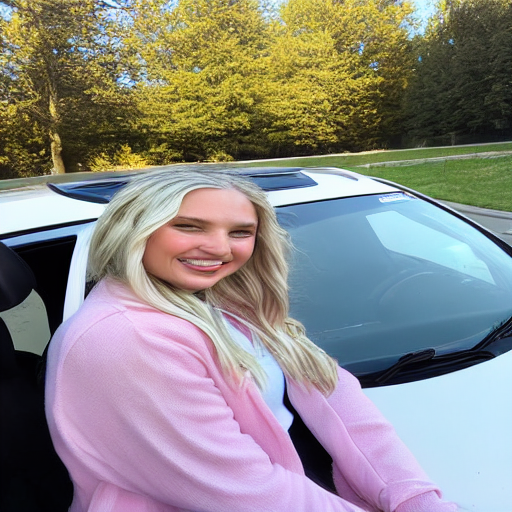

  0%|          | 0/50 [00:00<?, ?it/s]

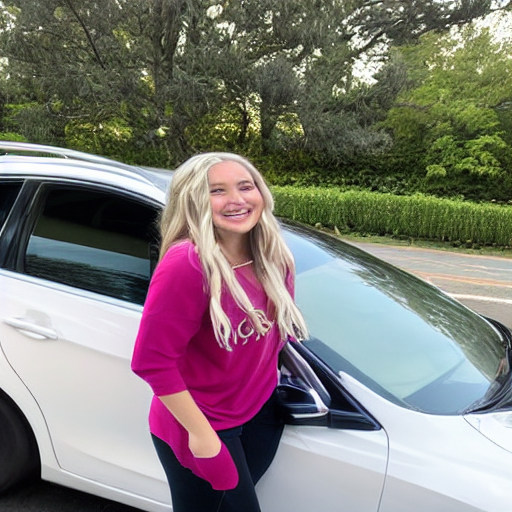

  0%|          | 0/50 [00:00<?, ?it/s]

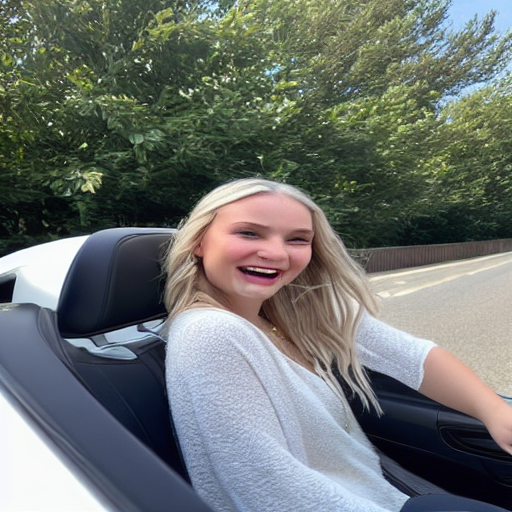

In [ ]:
#@title Generate image from prompt

#@markdown Prompt use to generate images
prompt = "a emma person driving a car" #@param {type:"string"}

#@markdown Number of inference steps
num_inference_steps = 50 #@param {type:"integer"}

#@markdown Guidance scale
guidance_scale = 7.5 #@param {type:"number"}

#@markdown Number of image to generate
num_images = 3 #@param {type:"integer"}

from IPython.display import display
for _ in range(num_images):
  image = pipe(prompt,
                num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale
               ).images[0]
  display(image)

In [ ]:
#@title Save your fine-tuned model to your huggingface-hub (Code from [HuggingFace Stable Diffusion Dreambooth Concepts Library](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/sd_dreambooth_training.ipynb) with modifications)

#@markdown HuggingFace repository name where the model will be saved to
repo_name = "emmaperson" #@param {type:"string"}

import os
from slugify import slugify
from huggingface_hub import HfApi, HfFolder, CommitOperationAdd
from huggingface_hub import create_repo
from IPython.display import display_markdown

# some api and huggingface account setup
api = HfApi()
your_username = api.whoami()["name"]

# save the model in the root of the model output folder
os.makedirs("fp16_model",exist_ok=True)
pipe.save_pretrained("fp16_model")

# retrieve your huggingFace repo and upload model
repo_id = f"{your_username}/{slugify(repo_name)}"


with open(HfFolder.path_token, 'r') as fin: hf_token = fin.read();


readme_text = f'''---
license: creativeml-openrail-m
tags:
- text-to-image
---
### Fine-tuned Stable Diffusion via Dreambooth
#### model by {api.whoami()["name"]}
A fine-tuned Stable Diffusion via Dreambooth
'''

# Save the readme to a file
readme_file = open("README.md", "w")
readme_file.write(readme_text)
readme_file.close()

# Save the token identifier to a file
text_file = open("token_identifier.txt", "w")
text_file.close()
operations = [
  CommitOperationAdd(path_in_repo="token_identifier.txt", path_or_fileobj="token_identifier.txt"),
  CommitOperationAdd(path_in_repo="README.md", path_or_fileobj="README.md"),
]

# create private repo
create_repo(repo_id, private=True, token=hf_token)

# commit and upload model
api.create_commit(
  repo_id=repo_id,
  operations=operations,
  commit_message=f"Uploaded fine-tuned model.",
  token=hf_token
)
api.upload_folder(
  folder_path="fp16_model",
  path_in_repo="",
  repo_id=repo_id,
  token=hf_token
)


print(f'## Your model was saved successfully. [Click here to access it](https://huggingface.co/{repo_id})')

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

## Your model was saved successfully. [Click here to access it](https://huggingface.co/ttamer/emmaperson)


In [ ]:
#@title DELETE checkpoint to free up space

#@markdown Checkpoint to be deleted
delete_confirmation = True #@param {type:"boolean"}
checkpoint_number = 100 #@param {type:"number"}

import shutil

if(delete_confirmation):
  shutil.rmtree(f'{output_dir}/checkpoint-{checkpoint_number}')
